##  A.1

Stock: FB ; index: S&P500, from Feb.22nd 2015 to Feb.22nd 2020.

## B.1

In [1]:
# load data and packages
import pandas as pd

df_fb = pd.read_csv("FB.csv", index_col='Date', parse_dates=True)

In [3]:
df_fb.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-02-23,79.959999,80.190002,78.379997,78.839996,78.839996,24139100
2015-02-24,78.500000,79.480003,78.099998,78.449997,78.449997,18897100
2015-02-25,78.500000,80.199997,78.500000,79.559998,79.559998,25593800


Text(0.5, 1.0, 'Line Chart for Facebook Adjusted Closing Price')

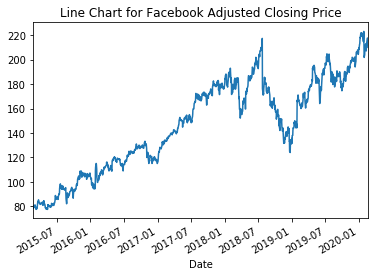

In [2]:
# line chart
%matplotlib inline
import matplotlib.pyplot as plt

df_fb['Adj Close'].plot()
plt.title("Line Chart for Facebook Adjusted Closing Price")

## C.1 

In [3]:
# load data

df_sp = pd.read_csv("S&P500.csv", index_col='Date', parse_dates=True)

# combine two dataframes
df_comp = pd.DataFrame({"FB":df_fb['Adj Close'],
                       "SP500":df_sp['Adj Close']})

In [4]:
df_comp.head()

,FB,SP500
Date,,
2015-02-23,78.839996,2109.659912
2015-02-24,78.449997,2115.479980
2015-02-25,79.559998,2113.860107
2015-02-26,80.410004,2110.739990
2015-02-27,78.970001,2104.500000


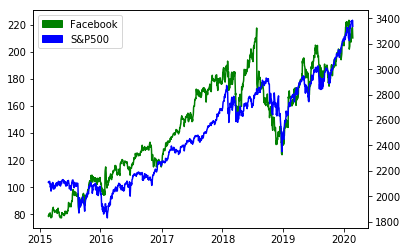

In [5]:
import seaborn as sns
import matplotlib.patches as mpatches

sns.lineplot(data=df_comp.FB, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_comp.SP500, color="b", ax=ax2)

# customize legend
FB = mpatches.Patch(color='green', label='Facebook')
SP = mpatches.Patch(color='blue', label='S&P500')
plt.legend(handles=[FB, SP])

## C.2 

FB outperform the S&P500 over the period.

## D.1 

In [6]:
# filter out data between 2015 and 2018

df_beta = df_comp[df_comp.index.year.isin(range(2017, 2019))]

In [7]:
FB_return = df_beta.FB.pct_change()[1:]
SP_return = df_beta.SP500.pct_change()[1:]

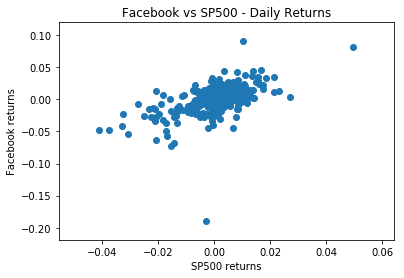

In [8]:
plt.title("Facebook vs SP500 - Daily Returns")
plt.scatter(SP_return, FB_return)
plt.xlabel('SP500 returns')
plt.ylabel('Facebook returns')
plt.show()

## D.2  

In [9]:
import statsmodels.api as sm

# regression of FB returns vs. SP500; assumes intercept = 0
indvars = sm.add_constant(SP_return) #
model = sm.OLS(FB_return, indvars).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     FB   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     228.6
Date:                Sun, 24 May 2020   Prob (F-statistic):           8.51e-43
Time:                        10:45:54   Log-Likelihood:                 1380.3
No. Observations:                 501   AIC:                            -2757.
Df Residuals:                     499   BIC:                            -2748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.822e-05      0.001      0.143      0.8

/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Formula: \begin{align}  y_{fb} = .0000982 + 1.28x +  \end{align}
### R-squared: 0.32
### Beta: 1.2774

A beta that is greater than 1.0 indicates that the security's price is more volatile than the market. 

## E.1 

In [10]:
df_fb['return'] = df_fb['Adj Close'].pct_change()
df_fb.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2015-02-23,79.959999,80.190002,78.379997,78.839996,78.839996,24139100,NaN
2015-02-24,78.500000,79.480003,78.099998,78.449997,78.449997,18897100,-0.004947
2015-02-25,78.500000,80.199997,78.500000,79.559998,79.559998,25593800,0.014149
2015-02-26,79.879997,81.370003,79.720001,80.410004,80.410004,31111900,0.010684
2015-02-27,80.680000,81.230003,78.620003,78.970001,78.970001,30739200,-0.017908


Highest return:

In [11]:
df_fb.loc[df_fb['return'].idxmax()]

Open         1.072000e+02
High         1.103400e+02
Low          1.048100e+02
Close        1.091100e+02
Adj Close    1.091100e+02
Volume       1.074753e+08
return       1.552144e-01
Name: 2016-01-28 00:00:00, dtype: float64

Lowest return:

In [12]:
df_fb.loc[df_fb['return'].idxmin()]

Open         1.748900e+02
High         1.801300e+02
Low          1.737500e+02
Close        1.762600e+02
Adj Close    1.762600e+02
Volume       1.698037e+08
return      -1.896092e-01
Name: 2018-07-26 00:00:00, dtype: float64

On 2018-07-26, the company missed projections on revenue and growth
https://www.marketwatch.com/story/facebook-stock-crushed-after-revenue-user-growth-miss-2018-07-25

## F.1 

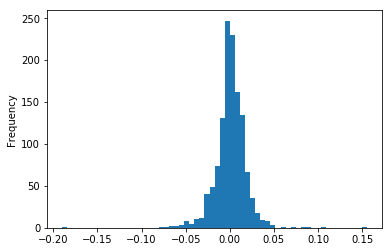

In [13]:
df_fb['return'].plot(kind='hist', bins=60)

## F.2 

In [14]:
# statistics on daily returns
print("mean=", "%.5f" % df_fb['return'].mean())
print("std dev=", "%.5f" % df_fb['return'].std())

mean= 0.00094
std dev= 0.01785


## F.3 

In [15]:
print("skewness=", "%.1f" % df_fb['return'].skew())
print("kurtosis=", "%.1f" % df_fb['return'].kurt())

skewness= -0.5
kurtosis= 17.1


The high kurtosis indicates the distribution's tails are fatter than a normal distribution.